In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/var/folders/t_/t17z84q161x8dcgl_1nslzxr0000gn/T/ipykernel_5555/3857368443.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Data = pd.read_csv('/Users/shenglienlee/Desktop/Work/Job/Full Time/Taiwan/Interview/友達/project/GHR_Cancellation_Analysis/Data/R2_final_hotels.csv')
Data


,ArrivalDate,ArrivalWeekNumber,AssignedRoom,AverageDailyRate,BookingChanges,BookingCompany,BookingDistributionChannel,BookingMeal,BookingParking,Country,...,PreviousBookingsNotCanceled,PreviousCancellations,RepeatedGuest,ReservationStatus,ReservationStatusDate,ReservedRoom,StaysInWeekendNights,StaysInWeekNights,TotalOfSpecialRequests,TravelAgent
0,8/14/17,33,A,78.49,0,NaN,TA/TO,SC,0.0,BRA,...,0,0,0,Check-Out,8/21/17,A,2,4,2,9.0
1,4/24/17,17,A,113.86,0,NaN,TA/TO,BB,0.0,AUT,...,0,0,0,Check-Out,4/27/17,A,2,2,0,21.0
2,8/25/15,35,A,94.51,0,NaN,TA/TO,HB,0.0,ITA,...,0,0,0,Canceled,7/9/15,A,2,1,0,17.0
3,8/15/17,33,D,124.99,0,NaN,TA/TO,BB,0.0,CHE,...,0,0,0,Canceled,5/2/17,D,1,3,1,9.0
4,10/12/16,41,A,129.25,0,NaN,TA/TO,BB,0.0,PRT,...,0,0,0,Check-Out,10/16/16,A,0,2,2,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94359,9/18/17,38,F,190.87,1,NaN,Direct,BB,0.0,PRT,...,0,0,0,Check-Out,9/20/17,D,1,2,1,14.0
94360,9/24/17,38,A,171.88,0,NaN,TA/TO,BB,0.0,PRT,...,0,1,0,Canceled,7/23/17,A,2,1,0,1.0
94361,11/28/17,48,A,88.68,0,NaN,TA/TO,SC,0.0,NLD,...,0,0,0,Check-Out,12/29/17,A,2,2,0,9.0
94362,11/3/17,44,A,72.41,1,NaN,TA/TO,SC,0.0,AUS,...,0,0,0,Check-Out,11/5/17,A,0,1,2,8.0


In [3]:
# Display summary statistics
Data.describe()


,ArrivalWeekNumber,AverageDailyRate,BookingChanges,BookingCompany,BookingParking,DaysInWaitingList,LeadTime,NumberOfAdult,NumberOfBabies,NumberOfChildren,PreviousBookingsNotCanceled,PreviousCancellations,RepeatedGuest,StaysInWeekendNights,StaysInWeekNights,TotalOfSpecialRequests,TravelAgent
count,94364.000000,94364.000000,94364.000000,4730.000000,94352.000000,94364.000000,94364.000000,94364.000000,94364.000000,94360.000000,94364.000000,94364.000000,94364.000000,94364.000000,94364.000000,94364.000000,83643.000000
mean,29.841253,105.383492,0.196622,131.552854,0.025755,2.089600,106.562725,1.847251,0.007344,0.095708,0.119230,0.079225,0.026906,0.840278,2.168507,0.606852,22.384599
std,13.608296,40.527313,0.585656,109.064285,0.158403,17.106297,112.738930,0.499677,0.085382,0.378312,1.286463,0.358293,0.161811,0.901839,1.492879,0.823482,44.693006
min,1.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,78.910000,0.000000,40.000000,0.000000,0.000000,21.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000
50%,32.000000,99.560000,0.000000,72.000000,0.000000,0.000000,67.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,9.000000
75%,41.000000,125.250000,0.000000,202.000000,0.000000,0.000000,158.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,14.000000
max,53.000000,364.960000,8.000000,485.000000,1.000000,391.000000,629.000000,4.000000,1.000000,3.000000,53.000000,13.000000,1.000000,9.000000,21.000000,5.000000,509.000000


In [4]:
# check is there any missing value in dataframe
Data.isnull().sum()

ArrivalDate                        0
ArrivalWeekNumber                  0
AssignedRoom                       7
AverageDailyRate                   0
BookingChanges                     0
BookingCompany                 89634
BookingDistributionChannel         5
BookingMeal                        0
BookingParking                    12
Country                          243
CustomerType                       0
DaysInWaitingList                  0
DepositType                        3
LeadTime                           0
MarketSegment                      0
NumberOfAdult                      0
NumberOfBabies                     0
NumberOfChildren                   4
PreviousBookingsNotCanceled        0
PreviousCancellations              0
RepeatedGuest                      0
ReservationStatus                  0
ReservationStatusDate              0
ReservedRoom                       2
StaysInWeekendNights               0
StaysInWeekNights                  0
TotalOfSpecialRequests             0
T

# Preprocessing

In [5]:
Data = Data[Data['AverageDailyRate'] > 0]
Data = Data[Data['NumberOfAdult'] > 0]
#remove no stay's customer
Data = Data[Data['StaysInWeekNights'] + Data['StaysInWeekendNights'] > 0]

Data = Data.reset_index(drop=True)
len(Data)




92661

In [6]:
# Data transformation / Quality check
Data['ArrivalDate'] = pd.to_datetime(Data['ArrivalDate'])

# Remove spaces from column AssignedRoom and ReservedRoom
Data['AssignedRoom'] = Data['AssignedRoom'].str.replace(' ','')
Data['ReservedRoom'] = Data['ReservedRoom'].str.replace(' ','')


#Add addtional features
# Is Family
Data['Is_family'] = (Data['NumberOfChildren'] > 0) | (Data['NumberOfBabies'] > 0)
Data['Is_family'] = Data['Is_family'].astype(int)
#Is weekend
Data['Is_weekend'] = (Data['StaysInWeekendNights'] > 0).astype(int)
#total night to stay
Data['TotalNights'] = Data['StaysInWeekendNights'] + Data['StaysInWeekNights']
#revenue
Data['Revenue'] = Data['AverageDailyRate'] * Data['TotalNights']

Data.head()

/var/folders/t_/t17z84q161x8dcgl_1nslzxr0000gn/T/ipykernel_5555/1755492611.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data['ArrivalDate'] = pd.to_datetime(Data['ArrivalDate'])


,ArrivalDate,ArrivalWeekNumber,AssignedRoom,AverageDailyRate,BookingChanges,BookingCompany,BookingDistributionChannel,BookingMeal,BookingParking,Country,...,ReservationStatusDate,ReservedRoom,StaysInWeekendNights,StaysInWeekNights,TotalOfSpecialRequests,TravelAgent,Is_family,Is_weekend,TotalNights,Revenue
0,2017-08-14,33,A,78.49,0,NaN,TA/TO,SC,0.0,BRA,...,8/21/17,A,2,4,2,9.0,0,1,6,470.94
1,2017-04-24,17,A,113.86,0,NaN,TA/TO,BB,0.0,AUT,...,4/27/17,A,2,2,0,21.0,0,1,4,455.44
2,2015-08-25,35,A,94.51,0,NaN,TA/TO,HB,0.0,ITA,...,7/9/15,A,2,1,0,17.0,0,1,3,283.53
3,2017-08-15,33,D,124.99,0,NaN,TA/TO,BB,0.0,CHE,...,5/2/17,D,1,3,1,9.0,0,1,4,499.96
4,2016-10-12,41,A,129.25,0,NaN,TA/TO,BB,0.0,PRT,...,10/16/16,A,0,2,2,9.0,0,0,2,258.50


In [7]:
# Encoding categorical variables
#Segment
segment_mapping = {'Offline TA/TO': 0, 'Groups': 1, 'Online TA': 2, 'Direct': 3, 'Corporate': 4, 'Complementary': 5, 'Aviation': 6}
Data['MarketSegment_ID'] = Data['MarketSegment'].map(segment_mapping)

# CustomerType
customer_type_mapping = {'Transient': 0, 'Transient-Party': 1, 'Contract': 2, 'Group': 3}
Data['CustomerType_ID'] = Data['CustomerType'].map(customer_type_mapping)
Data.head()

,ArrivalDate,ArrivalWeekNumber,AssignedRoom,AverageDailyRate,BookingChanges,BookingCompany,BookingDistributionChannel,BookingMeal,BookingParking,Country,...,StaysInWeekendNights,StaysInWeekNights,TotalOfSpecialRequests,TravelAgent,Is_family,Is_weekend,TotalNights,Revenue,MarketSegment_ID,CustomerType_ID
0,2017-08-14,33,A,78.49,0,NaN,TA/TO,SC,0.0,BRA,...,2,4,2,9.0,0,1,6,470.94,2,0
1,2017-04-24,17,A,113.86,0,NaN,TA/TO,BB,0.0,AUT,...,2,2,0,21.0,0,1,4,455.44,0,1
2,2015-08-25,35,A,94.51,0,NaN,TA/TO,HB,0.0,ITA,...,2,1,0,17.0,0,1,3,283.53,0,1
3,2017-08-15,33,D,124.99,0,NaN,TA/TO,BB,0.0,CHE,...,1,3,1,9.0,0,1,4,499.96,2,0
4,2016-10-12,41,A,129.25,0,NaN,TA/TO,BB,0.0,PRT,...,0,2,2,9.0,0,0,2,258.50,2,0


In [8]:
#Select feature used in clustering
data_model = Data[['NumberOfAdult', 'Is_family', 'Is_weekend', 'TotalNights','MarketSegment_ID', 'CustomerType_ID', 'Revenue', 'LeadTime', 'TotalOfSpecialRequests', 'AverageDailyRate']]

In [9]:
#Normalization numeric data
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['TotalNights', 'Revenue', 'LeadTime', 'AverageDailyRate', 'TotalOfSpecialRequests']
subset_data = data_model[columns_to_scale]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(subset_data)
scaled_data_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
# Drop the original columns from data_model
data_model.drop(columns=['TotalNights', 'Revenue', 'LeadTime', 'AverageDailyRate', 'TotalOfSpecialRequests'], inplace=True)
# Concatenate the scaled columns to data_model
data_model = pd.concat([data_model, scaled_data_df], axis=1)

data_model



/var/folders/t_/t17z84q161x8dcgl_1nslzxr0000gn/T/ipykernel_5555/3593488296.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.drop(columns=['TotalNights', 'Revenue', 'LeadTime', 'AverageDailyRate', 'TotalOfSpecialRequests'], inplace=True)


,NumberOfAdult,Is_family,Is_weekend,MarketSegment_ID,CustomerType_ID,TotalNights,Revenue,LeadTime,AverageDailyRate,TotalOfSpecialRequests
0,2,0,1,2,0,0.172414,0.090082,0.012719,0.214053,0.4
1,2,0,1,0,1,0.103448,0.087114,0.122417,0.311092,0.0
2,2,0,1,0,1,0.068966,0.054191,0.186010,0.258004,0.0
3,2,0,1,2,0,0.103448,0.095640,0.421304,0.341628,0.2
4,2,0,0,2,0,0.034483,0.049398,0.000000,0.353316,0.4
...,...,...,...,...,...,...,...,...,...,...
92656,1,0,1,3,0,0.068966,0.109553,0.000000,0.522374,0.2
92657,2,0,1,1,1,0.068966,0.098642,0.562798,0.470274,0.0
92658,2,0,1,2,0,0.103448,0.067825,0.028617,0.242009,0.0
92659,2,0,0,2,0,0.000000,0.013760,0.117647,0.197372,0.4


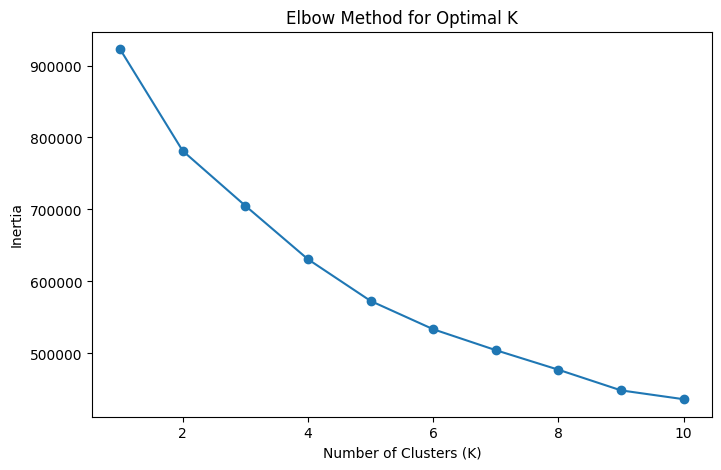

In [10]:
# Assuming 'data_model' is your DataFrame
data = data_model[['NumberOfAdult', 'Is_family', 'Is_weekend', 'TotalNights', 'MarketSegment_ID', 'CustomerType_ID', 'Revenue', 'LeadTime', 'TotalOfSpecialRequests', 'AverageDailyRate']]

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Optional: Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
data_pca = pca.fit_transform(data_scaled)

# Use the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca if 'data_pca' in locals() else data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [11]:
# Choose the optimal K based on the Elbow Method
optimal_k = 4  # Update with the optimal number of clusters

# Fit the K-means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_pca if 'data_pca' in locals() else data_scaled)

# Add the cluster labels to the original DataFrame
data_model['Cluster'] = clusters
data_model


,NumberOfAdult,Is_family,Is_weekend,MarketSegment_ID,CustomerType_ID,TotalNights,Revenue,LeadTime,AverageDailyRate,TotalOfSpecialRequests,Cluster
0,2,0,1,2,0,0.172414,0.090082,0.012719,0.214053,0.4,1
1,2,0,1,0,1,0.103448,0.087114,0.122417,0.311092,0.0,0
2,2,0,1,0,1,0.068966,0.054191,0.186010,0.258004,0.0,0
3,2,0,1,2,0,0.103448,0.095640,0.421304,0.341628,0.2,1
4,2,0,0,2,0,0.034483,0.049398,0.000000,0.353316,0.4,2
...,...,...,...,...,...,...,...,...,...,...,...
92656,1,0,1,3,0,0.068966,0.109553,0.000000,0.522374,0.2,1
92657,2,0,1,1,1,0.068966,0.098642,0.562798,0.470274,0.0,0
92658,2,0,1,2,0,0.103448,0.067825,0.028617,0.242009,0.0,0
92659,2,0,0,2,0,0.000000,0.013760,0.117647,0.197372,0.4,2


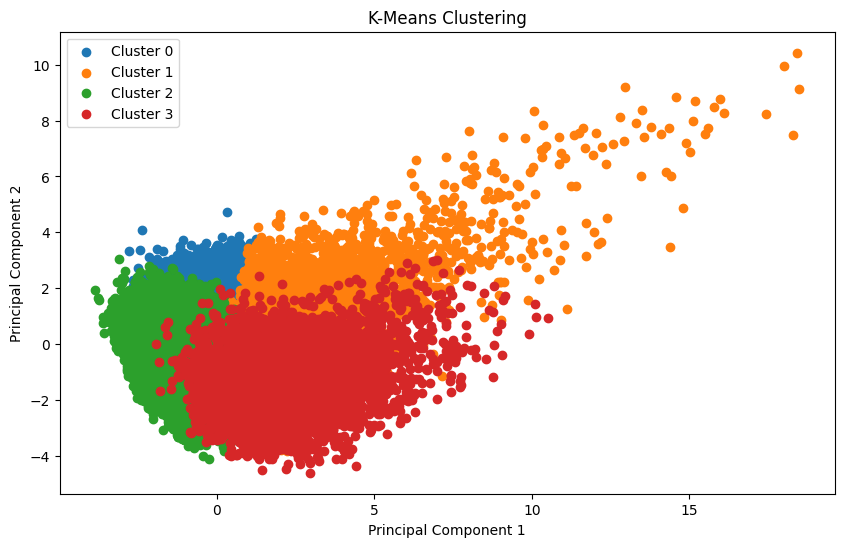

In [12]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_points = data_pca[data_model['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [13]:
Data['Cluster'] = data_model['Cluster']
Data.to_csv('/Users/shenglienlee/Desktop/Work/Job/Full Time/Taiwan/Interview/友達/project/GHR_Cancellation_Analysis/Data/hotel_data_Clustered.csv', index=False)


## Do the EDA by Tableau and define the cluster
### 0:weekend-short stay  
### 1: High-value long stay
### 2: Business short-stay
### 3: Family Travel

In [14]:
Data['Cluster']

0        1
1        0
2        0
3        1
4        2
        ..
92656    1
92657    0
92658    0
92659    2
92660    0
Name: Cluster, Length: 92661, dtype: int32

In [15]:
#Decode categorical features
#cluster
cluster_mapping = {0: 'weekend-short stay', 1: 'High-value long stay', 2: 'Business short-stay', 3: 'Family Travel'}
Data['Cluster'] = Data['Cluster'].map(cluster_mapping)
#Segment
segment_mapping = {0: 'Offline TA/TO', 1: 'Groups', 2: 'Online TA', 3: 'Direct', 4: 'Corporate', 5: 'Complementary', 6: 'Aviation'}
Data['MarketSegment'] = Data['MarketSegment_ID'].map(segment_mapping)

# CustomerType
customer_type_mapping = {0: 'Transient', 1:'Transient-Party' , 2: 'Contract', 3: 'Group'}
Data['CustomerType'] = Data['CustomerType_ID'].map(customer_type_mapping)

In [16]:
# Show data types for all columns
print(Data.dtypes)

# Or more detailed info
print(Data.info())

ArrivalDate                    datetime64[ns]
ArrivalWeekNumber                       int64
AssignedRoom                           object
AverageDailyRate                      float64
BookingChanges                          int64
BookingCompany                        float64
BookingDistributionChannel             object
BookingMeal                            object
BookingParking                        float64
Country                                object
CustomerType                           object
DaysInWaitingList                       int64
DepositType                            object
LeadTime                                int64
MarketSegment                          object
NumberOfAdult                           int64
NumberOfBabies                          int64
NumberOfChildren                      float64
PreviousBookingsNotCanceled             int64
PreviousCancellations                   int64
RepeatedGuest                           int64
ReservationStatus                 

In [17]:
Data.to_csv('/Users/shenglienlee/Desktop/Work/Job/Full Time/Taiwan/Interview/友達/project/GHR_Cancellation_Analysis/Data/hotel_data_Clustered_map_features.csv', index=False)